## Imports

In [1]:
import os
import shutil
import kagglehub
import pandas as pd
from src.utils import DATA_DIR, DATASET, CSV_PATH
from src.data_preprocessing import load_data, preprocess_data, summarize_data
from scripts.train_model import train_and_evaluate, plot_roc_curves, save_best_model

## Acquire Data

In [2]:
# Paths


# === DOWNLOAD FROM KAGGLE IF FILE DOESN'T EXIST ===
if not os.path.exists(CSV_PATH):
    try:
        print(f"📥 Downloading dataset from Kaggle: {DATASET}")
        dataset_cache = kagglehub.dataset_download(DATASET)
        shutil.copytree(dataset_cache, DATA_DIR, dirs_exist_ok=True)
        print(f"✅ Dataset saved to {DATA_DIR}")
    except Exception as e:
        print(f"❌ Failed to download or copy dataset: {e}")
else:
    print(f"✅ {CSV_PATH} already exists. Skipping download.")

✅ data/raw/creditcard.csv already exists. Skipping download.


## Preprocess Data

In [3]:
df = load_data(CSV_PATH)

summarize_data(df)

# Preprocess
X_train, X_test, y_train, y_test = preprocess_data(df, apply_smote=True)

print("Train:", X_train.shape, "Test:", X_test.shape)

📊 Dataset Summary
Shape: (284807, 31)

Missing values per column:
Time      0
V16       0
Amount    0
V28       0
V27       0
dtype: int64

Class distribution (fraud ratio):
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

Amount statistics:
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

Time statistics:
count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64
Train: (454902, 31) Test: (56962, 31)


## Train and Evaluate Models


🔹 Training Logistic Regression...


/Users/muhammadawais/Downloads/fraud-detection/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.12      0.90      0.21        98

    accuracy                           0.99     56962
   macro avg       0.56      0.94      0.60     56962
weighted avg       1.00      0.99      0.99     56962

ROC-AUC: 0.9756540489014964
Confusion Matrix:
 [[56209   655]
 [   10    88]]

🔹 Training Random Forest...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.51      0.89      0.65        98

    accuracy                           1.00     56962
   macro avg       0.76      0.94      0.83     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9848216439079852
Confusion Matrix:
 [[56782    82]
 [   11    87]]

🔹 Training XGBoost...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      

<Figure size 800x600 with 0 Axes>

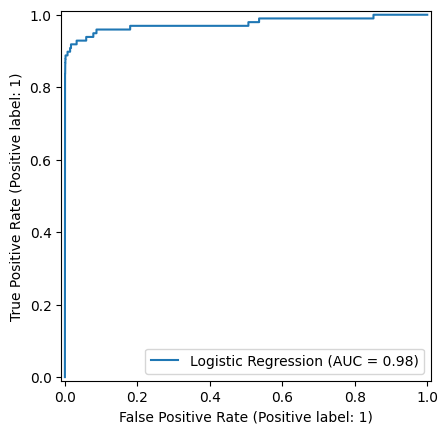

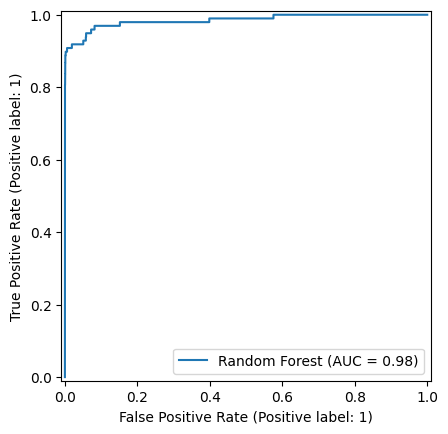

In [4]:
# Train and evaluate
results = train_and_evaluate(X_train, X_test, y_train, y_test)

# Plot ROC curves
plot_roc_curves(results, X_test, y_test)

# Save best model
save_best_model(results)